<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-cad_equipo_18/blob/main/Equipo_18_Entrega_2_Aguas_Subterraneas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

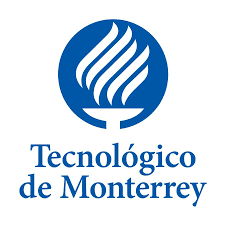

# **TC4029 Ciencia y analítica de datos**

Reto: Entrega 2

Clasificación-ensambles y presentación ejecutiva

# **Aguas subterraneas**

José Eduardo Esperón Carreón A01372413

Moisés Rangel Silva A00143704

Profesora: Dra. María de la Paz Rico Fernández

Noviembre 18 de 2022

##**Indice de la Entrega 1**

*   Limpieza de base de datos.

> Explorar  cada datos (auxiliate de describe(), mean(), plot, boxplot de pandas):
*   Identificando tendencias centrales promedio, media y mediana de los datos.
*   Identificar medidas de dispersión, máximo, mínimo
*   Identificar medidas de posición no centrales , los cuartiles , outliers
*   Identificar correlaciones.
*   Preparar los datos


*   Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.

*   Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.



In [1]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import graphviz
import math
import pydotplus
import missingno as msno
import seaborn as sns  
import seaborn as load_dataset
import os
import warnings

from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler  
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OneHotEncoder, FunctionTransformer
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from IPython.display import Image
from scipy.stats import boxcox
from sklearn import tree
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, KFold, train_test_split, cross_validate, learning_curve, RepeatedKFold
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline

from tqdm import tqdm
%matplotlib inline
import geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 532 kB/s 
     |████████████████████████████████| 1.0 MB 22.0 MB/s 
     |████████████████████████████████| 1.7 MB 42.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 52.5 MB/s 
     |████████████████████████████████| 6.3 MB 42.8 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=61570a4f467e104fbd9893cd9a83fe4ccb8368fd5d027a192467a522569d500d
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=788b00e4bb9c5e8fae59e0983483828ba266f5b52f3b5f3e27f55a698a8a2840
  Stored in directory: /root/.

In [3]:
#Creación del data frame de las aguas subterraneas

Data = "/content/sample_data/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv"
Data0 = pd.read_csv(Data, encoding = "ISO-8859-1")
Data0

warnings.filterwarnings('ignore')


In [4]:
Data0.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [5]:
Data0.dtypes

CLAVE                    object
SITIO                    object
ORGANISMO_DE_CUENCA      object
ESTADO                   object
MUNICIPIO                object
ACUIFERO                 object
SUBTIPO                  object
LONGITUD                float64
LATITUD                 float64
PERIODO                   int64
ALC_mg/L                float64
CALIDAD_ALC              object
CONDUCT_mS/cm           float64
CALIDAD_CONDUC           object
SDT_mg/L                float64
SDT_M_mg/L               object
CALIDAD_SDT_ra           object
CALIDAD_SDT_salin        object
FLUORUROS_mg/L           object
CALIDAD_FLUO             object
DUR_mg/L                 object
CALIDAD_DUR              object
COLI_FEC_NMP/100_mL      object
CALIDAD_COLI_FEC         object
N_NO3_mg/L               object
CALIDAD_N_NO3            object
AS_TOT_mg/L              object
CALIDAD_AS               object
CD_TOT_mg/L              object
CALIDAD_CD               object
CR_TOT_mg/L              object
CALIDAD_

In [6]:
Data0.shape

(1068, 57)

# Limpieza de base de datos.

In [7]:
Data0.isnull().values.any()  #Si existen valores nulos

True

In [8]:
Data0.isnull().any()

CLAVE                   False
SITIO                   False
ORGANISMO_DE_CUENCA     False
ESTADO                  False
MUNICIPIO               False
ACUIFERO                False
SUBTIPO                 False
LONGITUD                False
LATITUD                 False
PERIODO                 False
ALC_mg/L                 True
CALIDAD_ALC              True
CONDUCT_mS/cm            True
CALIDAD_CONDUC           True
SDT_mg/L                 True
SDT_M_mg/L               True
CALIDAD_SDT_ra           True
CALIDAD_SDT_salin        True
FLUORUROS_mg/L          False
CALIDAD_FLUO            False
DUR_mg/L                 True
CALIDAD_DUR              True
COLI_FEC_NMP/100_mL     False
CALIDAD_COLI_FEC        False
N_NO3_mg/L               True
CALIDAD_N_NO3            True
AS_TOT_mg/L             False
CALIDAD_AS              False
CD_TOT_mg/L             False
CALIDAD_CD              False
CR_TOT_mg/L             False
CALIDAD_CR              False
HG_TOT_mg/L             False
CALIDAD_HG

In [9]:
#Mostrar los datos faltantes:

Data0[Data0.isnull()]

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Reemplazando datos categóricos donde deben ser numéricos
Data1 = Data0.copy()
Data1["SDT_M_mg/L"]= Data1["SDT_M_mg/L"].replace(["<25"], 24.999)

Data1["FLUORUROS_mg/L"]= Data1["FLUORUROS_mg/L"].replace(["<0.2"], 0.199)

Data1["DUR_mg/L"]= Data1["DUR_mg/L"].replace(["<20"], 19.999)

Data1["COLI_FEC_NMP/100_mL"]= Data1["COLI_FEC_NMP/100_mL"].replace(["<1.1"], 1.099)

Data1["N_NO3_mg/L"]= Data1["N_NO3_mg/L"].replace(["<0.02"], 0.0199)

Data1["AS_TOT_mg/L"]= Data1["AS_TOT_mg/L"].replace(["<0.01"], 0.0099)

Data1["CD_TOT_mg/L"]= Data1["CD_TOT_mg/L"].replace(["<0.003"], 0.00299)

Data1["CR_TOT_mg/L"]= Data1["CR_TOT_mg/L"].replace(["<0.005"], 0.00499)

Data1["HG_TOT_mg/L"]= Data1["HG_TOT_mg/L"].replace(["<0.0005"], 0.000499)

Data1["PB_TOT_mg/L"]= Data1["PB_TOT_mg/L"].replace(["<0.005"], 0.00499)

Data1["MN_TOT_mg/L"]= Data1["MN_TOT_mg/L"].replace(["<0.0015"], 0.001499)

Data1["FE_TOT_mg/L"]= Data1["FE_TOT_mg/L"].replace(["<0.025"], 0.02499)

# Reemplazando ND por NO en binarias
Data1["CUMPLE_CON_ALC"]= Data1["CUMPLE_CON_ALC"].replace(["ND"], ["NO"])

Data1["CUMPLE_CON_COND"]= Data1["CUMPLE_CON_COND"].replace(["ND"], ["NO"])

Data1["CUMPLE_CON_SDT_ra"]= Data1["CUMPLE_CON_SDT_ra"].replace(["ND"], ["NO"])

Data1["CUMPLE_CON_SDT_salin"]= Data1["CUMPLE_CON_SDT_salin"].replace(["ND"], ["NO"])

Data1["CUMPLE_CON_DUR"]= Data1["CUMPLE_CON_DUR"].replace(["ND"], ["NO"])

Data1["CUMPLE_CON_NO3"]= Data1["CUMPLE_CON_NO3"].replace(["ND"], ["NO"])

Se reemplaza ND (no definido) por No, debido la importancia de que NO haya contaminantes en el agua.

Imputación a todas las variables de entrada, diferenciando entre el tipo de cada variable

In [11]:
#Columnas categóricas
df_name_cate = ['CLAVE','SITIO','ORGANISMO_DE_CUENCA','ESTADO','MUNICIPIO','ACUIFERO','SUBTIPO','CALIDAD_ALC','CALIDAD_CONDUC','CALIDAD_SDT_ra','CALIDAD_SDT_salin','CALIDAD_FLUO','CALIDAD_DUR','CALIDAD_COLI_FEC','CALIDAD_N_NO3','CALIDAD_AS','CALIDAD_CD','CALIDAD_CR','CALIDAD_HG','CALIDAD_PB','CALIDAD_MN','CALIDAD_FE','SEMAFORO','CONTAMINANTES']
#Columnas ordinales o discretas cuantitativas
df_name_ord = ['PERIODO']
#Columnas numéricas o cuantitativas
df_name_num = ['LONGITUD','LATITUD','ALC_mg/L','CONDUCT_mS/cm','SDT_mg/L','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']
#Columnas binarias
df_name_bin = ['CUMPLE_CON_ALC','CUMPLE_CON_COND','CUMPLE_CON_SDT_ra','CUMPLE_CON_SDT_salin','CUMPLE_CON_FLUO','CUMPLE_CON_DUR','CUMPLE_CON_CF','CUMPLE_CON_NO3','CUMPLE_CON_AS','CUMPLE_CON_CD','CUMPLE_CON_CR','CUMPLE_CON_HG','CUMPLE_CON_PB','CUMPLE_CON_MN','CUMPLE_CON_FE']


In [12]:
#Revisión de los posibles valores de cada propiedad categóricas
for n in df_name_cate:
  print(n + ": ", Data1[n].unique())

CLAVE:  ['DLAGU6' 'DLAGU6516' 'DLAGU7' ... 'OCRBR5105M2' 'OCRBR5106M1'
 'OCRBR5109M1']
SITIO:  ['POZO SAN GIL' 'POZO R013 CAÑADA HONDA' 'POZO COSIO' ...
 'HACIENDA MEXIQUITO POZO 01' 'COMUNIDAD LOS POCITOS'
 'COMUNIDAD LA REFORMA']
ORGANISMO_DE_CUENCA:  ['LERMA SANTIAGO PACIFICO' 'PENINSULA DE BAJA CALIFORNIA'
 'PENINSULA DE YUCATAN' 'RIO BRAVO' 'CUENCAS CENTRALES DEL NORTE'
 'PACIFICO NORTE' 'BALSAS' 'PACIFICO SUR' 'GOLFO NORTE'
 'AGUAS DEL VALLE DE MEXICO' 'GOLFO CENTRO' 'FRONTERA SUR' 'NOROESTE']
ESTADO:  ['AGUASCALIENTES' 'BAJA CALIFORNIA SUR' 'CAMPECHE' 'CHIHUAHUA'
 'COAHUILA DE ZARAGOZA' 'COLIMA' 'DURANGO' 'MEXICO' 'GUANAJUATO'
 'GUERRERO' 'HIDALGO' 'MICHOACAN DE OCAMPO' 'NAYARIT' 'PUEBLA'
 'QUERETARO ARTEAGA' 'QUINTANA ROO' 'SAN LUIS POTOSI' 'TABASCO' 'TLAXCALA'
 'ZACATECAS' 'DISTRITO FEDERAL' 'MORELOS' 'OAXACA' 'CHIAPAS'
 'VERACRUZ DE IGNACIO DE LA LLAVE' 'TAMAULIPAS' 'JALISCO' 'SONORA'
 'BAJA CALIFORNIA' 'SINALOA' 'YUCATAN' 'NUEVO LEON']
MUNICIPIO:  ['ASIENTOS' 'AGUASCALIENTES

In [13]:
#Revisión de los posibles valores de cada propiedad ordinal
for n in df_name_ord:
  print(n + ": ", Data1[n].unique())

PERIODO:  [2020]


In [14]:
#Revisión de los posibles valores de cada propiedad binarias
for n in df_name_bin:
  print(n + ": ", Data1[n].unique())

CUMPLE_CON_ALC:  ['SI' 'NO']
CUMPLE_CON_COND:  ['SI' 'NO']
CUMPLE_CON_SDT_ra:  ['SI' 'NO']
CUMPLE_CON_SDT_salin:  ['SI' 'NO']
CUMPLE_CON_FLUO:  ['SI' 'NO']
CUMPLE_CON_DUR:  ['SI' 'NO']
CUMPLE_CON_CF:  ['SI' 'NO']
CUMPLE_CON_NO3:  ['SI' 'NO']
CUMPLE_CON_AS:  ['SI' 'NO']
CUMPLE_CON_CD:  ['SI' 'NO']
CUMPLE_CON_CR:  ['SI' 'NO']
CUMPLE_CON_HG:  ['SI' 'NO']
CUMPLE_CON_PB:  ['SI' 'NO']
CUMPLE_CON_MN:  ['SI' 'NO']
CUMPLE_CON_FE:  ['SI' 'NO']


In [15]:
#Revisión de nulos en el DataFrame
Data1.isnull().sum()

CLAVE                      0
SITIO                      0
ORGANISMO_DE_CUENCA        0
ESTADO                     0
MUNICIPIO                  0
ACUIFERO                   0
SUBTIPO                    0
LONGITUD                   0
LATITUD                    0
PERIODO                    0
ALC_mg/L                   4
CALIDAD_ALC                4
CONDUCT_mS/cm              6
CALIDAD_CONDUC             6
SDT_mg/L                1068
SDT_M_mg/L                 2
CALIDAD_SDT_ra             2
CALIDAD_SDT_salin          2
FLUORUROS_mg/L             0
CALIDAD_FLUO               0
DUR_mg/L                   1
CALIDAD_DUR                1
COLI_FEC_NMP/100_mL        0
CALIDAD_COLI_FEC           0
N_NO3_mg/L                 1
CALIDAD_N_NO3              1
AS_TOT_mg/L                0
CALIDAD_AS                 0
CD_TOT_mg/L                0
CALIDAD_CD                 0
CR_TOT_mg/L                0
CALIDAD_CR                 0
HG_TOT_mg/L                0
CALIDAD_HG                 0
PB_TOT_mg/L   

In [16]:
#Revisión de faltantes en el DataFrame
Data1.isna().any()

CLAVE                   False
SITIO                   False
ORGANISMO_DE_CUENCA     False
ESTADO                  False
MUNICIPIO               False
ACUIFERO                False
SUBTIPO                 False
LONGITUD                False
LATITUD                 False
PERIODO                 False
ALC_mg/L                 True
CALIDAD_ALC              True
CONDUCT_mS/cm            True
CALIDAD_CONDUC           True
SDT_mg/L                 True
SDT_M_mg/L               True
CALIDAD_SDT_ra           True
CALIDAD_SDT_salin        True
FLUORUROS_mg/L          False
CALIDAD_FLUO            False
DUR_mg/L                 True
CALIDAD_DUR              True
COLI_FEC_NMP/100_mL     False
CALIDAD_COLI_FEC        False
N_NO3_mg/L               True
CALIDAD_N_NO3            True
AS_TOT_mg/L             False
CALIDAD_AS              False
CD_TOT_mg/L             False
CALIDAD_CD              False
CR_TOT_mg/L             False
CALIDAD_CR              False
HG_TOT_mg/L             False
CALIDAD_HG

In [17]:
# Se elimina columna sin datos
Data2 = Data1.copy()
Data2.dropna(thresh = 1, axis = 1, inplace = True) 
Data2

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.54191,24.76036,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1064,OCRBR5102M1,L-305 (EJIDO OJO DE AGUA LAS CRUCESITAS),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.70099,24.78280,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
1065,OCRBR5105M2,HACIENDA MEXIQUITO POZO 01,RIO BRAVO,NUEVO LEON,CADEREYTA JIMENEZ,CITRICOLA NORTE,POZO,-99.82249,25.55197,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1066,OCRBR5106M1,COMUNIDAD LOS POCITOS,RIO BRAVO,NUEVO LEON,GALEANA,NAVIDAD-POTOSI-RAICES,POZO,-100.32683,24.80118,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


In [18]:
#Revisión de nulos en el DataFrame
Data2.isnull().sum()

CLAVE                     0
SITIO                     0
ORGANISMO_DE_CUENCA       0
ESTADO                    0
MUNICIPIO                 0
ACUIFERO                  0
SUBTIPO                   0
LONGITUD                  0
LATITUD                   0
PERIODO                   0
ALC_mg/L                  4
CALIDAD_ALC               4
CONDUCT_mS/cm             6
CALIDAD_CONDUC            6
SDT_M_mg/L                2
CALIDAD_SDT_ra            2
CALIDAD_SDT_salin         2
FLUORUROS_mg/L            0
CALIDAD_FLUO              0
DUR_mg/L                  1
CALIDAD_DUR               1
COLI_FEC_NMP/100_mL       0
CALIDAD_COLI_FEC          0
N_NO3_mg/L                1
CALIDAD_N_NO3             1
AS_TOT_mg/L               0
CALIDAD_AS                0
CD_TOT_mg/L               0
CALIDAD_CD                0
CR_TOT_mg/L               0
CALIDAD_CR                0
HG_TOT_mg/L               0
CALIDAD_HG                0
PB_TOT_mg/L               0
CALIDAD_PB                0
MN_TOT_mg/L         

In [19]:
# Nueva matriz eliminadno la columna sin datos
#Columnas categóricas
df_name_cate = ['CLAVE','SITIO','ORGANISMO_DE_CUENCA','ESTADO','MUNICIPIO','ACUIFERO','SUBTIPO','CALIDAD_ALC','CALIDAD_CONDUC','CALIDAD_SDT_ra','CALIDAD_SDT_salin','CALIDAD_FLUO','CALIDAD_DUR','CALIDAD_COLI_FEC','CALIDAD_N_NO3','CALIDAD_AS','CALIDAD_CD','CALIDAD_CR','CALIDAD_HG','CALIDAD_PB','CALIDAD_MN','CALIDAD_FE','SEMAFORO','CONTAMINANTES']
#Columnas ordinales o discretas cuantitativas
df_name_ord = ['PERIODO']
#Columnas numéricas o cuantitativas
df_name_num = ['LONGITUD','LATITUD','ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']
#Columnas binarias
df_name_bin = ['CUMPLE_CON_ALC','CUMPLE_CON_COND','CUMPLE_CON_SDT_ra','CUMPLE_CON_SDT_salin','CUMPLE_CON_FLUO','CUMPLE_CON_DUR','CUMPLE_CON_CF','CUMPLE_CON_NO3','CUMPLE_CON_AS','CUMPLE_CON_CD','CUMPLE_CON_CR','CUMPLE_CON_HG','CUMPLE_CON_PB','CUMPLE_CON_MN','CUMPLE_CON_FE']


Imputación de moda a los datos categóricos

In [20]:
def moda(columnas, df2):
  for col in columnas:
    try:
      moda = df2[col].mode()[0]
      print("la moda de " +col + " es: " + moda)
      df2[col] = df2[col].replace(np.nan, moda)
    except Exception as err:
      print("Se eliminara esta columna " + col + " " + str(err))
      df2.dropna(thresh = 1, axis = 1, inplace = True)
  return df2

In [21]:
def mediana(columnas, df2):
  for col in columnas:
    try:
      median = df2[col].median()
      print("la mediana de " +col + " es: " + str(median))
      df2[col] = df2[col].replace(np.nan, median)
    except Exception as err:
      print("Se eliminara esta columna " + col + " " + str(err))
      #df2 = df2.drop(col, axis=1, inplace=True)
      df2.dropna(thresh = 1, axis = 1, inplace = True)
  return df2

In [22]:
def str_a_float(columnas, df2):
  for col in columnas:
    for x in df2[col]:
      try:
        if "<" in x:
          y = x.replace('<', '')
          df2[col] = df2[col].replace(x, float(y))
      except Exception as err:
        pass  
  return df2 

In [23]:
Data3 = str_a_float(df_name_num, Data2)

In [24]:
Data4 = mediana(df_name_num, Data3)

la mediana de LONGITUD es: -102.17418
la mediana de LATITUD es: 22.61719
la mediana de ALC_mg/L es: 215.5275
la mediana de CONDUCT_mS/cm es: 815.0
la mediana de SDT_M_mg/L es: 550.4
la mediana de FLUORUROS_mg/L es: 0.5035000000000001
la mediana de DUR_mg/L es: 245.3358
la mediana de COLI_FEC_NMP/100_mL es: 1.099
la mediana de N_NO3_mg/L es: 2.080932
la mediana de AS_TOT_mg/L es: 0.0099
la mediana de CD_TOT_mg/L es: 0.00299
la mediana de CR_TOT_mg/L es: 0.00499
la mediana de HG_TOT_mg/L es: 0.000499
la mediana de PB_TOT_mg/L es: 0.00499
la mediana de MN_TOT_mg/L es: 0.001499
la mediana de FE_TOT_mg/L es: 0.04696


In [25]:
Data4 = moda(df_name_cate, Data3)

la moda de CLAVE es: DLAGU19
la moda de SITIO es: EL FUERTE
la moda de ORGANISMO_DE_CUENCA es: CUENCAS CENTRALES DEL NORTE
la moda de ESTADO es: DURANGO
la moda de MUNICIPIO es: LA PAZ
la moda de ACUIFERO es: PENINSULA DE YUCATAN
la moda de SUBTIPO es: POZO
la moda de CALIDAD_ALC es: Alta
la moda de CALIDAD_CONDUC es: Permisible para riego
la moda de CALIDAD_SDT_ra es: Excelente para riego
la moda de CALIDAD_SDT_salin es: Potable - Dulce
la moda de CALIDAD_FLUO es: Baja
la moda de CALIDAD_DUR es: Potable - Dura
la moda de CALIDAD_COLI_FEC es: Potable - Excelente
la moda de CALIDAD_N_NO3 es: Potable - Excelente
la moda de CALIDAD_AS es: Potable - Excelente
la moda de CALIDAD_CD es: Potable - Excelente
la moda de CALIDAD_CR es: Potable - Excelente
la moda de CALIDAD_HG es: Potable - Excelente
la moda de CALIDAD_PB es: Potable - Excelente
la moda de CALIDAD_MN es: Potable - Excelente
la moda de CALIDAD_FE es: Potable - Excelente
la moda de SEMAFORO es: Verde
la moda de CONTAMINANTES es: F

In [26]:
Data4 = moda(df_name_bin, Data3)

la moda de CUMPLE_CON_ALC es: SI
la moda de CUMPLE_CON_COND es: SI
la moda de CUMPLE_CON_SDT_ra es: SI
la moda de CUMPLE_CON_SDT_salin es: SI
la moda de CUMPLE_CON_FLUO es: SI
la moda de CUMPLE_CON_DUR es: SI
la moda de CUMPLE_CON_CF es: SI
la moda de CUMPLE_CON_NO3 es: SI
la moda de CUMPLE_CON_AS es: SI
la moda de CUMPLE_CON_CD es: SI
la moda de CUMPLE_CON_CR es: SI
la moda de CUMPLE_CON_HG es: SI
la moda de CUMPLE_CON_PB es: SI
la moda de CUMPLE_CON_MN es: SI
la moda de CUMPLE_CON_FE es: SI


In [27]:
Data4 = moda(df_name_ord, Data3)

Se eliminara esta columna PERIODO can only concatenate str (not "numpy.int64") to str


In [28]:
Data4[df_name_num] = Data4[df_name_num].astype(float)

In [29]:
# verificar si hay datos nulos
Data4.isnull().values.any()

False

In [30]:
Data4.isnull().sum()

CLAVE                   0
SITIO                   0
ORGANISMO_DE_CUENCA     0
ESTADO                  0
MUNICIPIO               0
ACUIFERO                0
SUBTIPO                 0
LONGITUD                0
LATITUD                 0
PERIODO                 0
ALC_mg/L                0
CALIDAD_ALC             0
CONDUCT_mS/cm           0
CALIDAD_CONDUC          0
SDT_M_mg/L              0
CALIDAD_SDT_ra          0
CALIDAD_SDT_salin       0
FLUORUROS_mg/L          0
CALIDAD_FLUO            0
DUR_mg/L                0
CALIDAD_DUR             0
COLI_FEC_NMP/100_mL     0
CALIDAD_COLI_FEC        0
N_NO3_mg/L              0
CALIDAD_N_NO3           0
AS_TOT_mg/L             0
CALIDAD_AS              0
CD_TOT_mg/L             0
CALIDAD_CD              0
CR_TOT_mg/L             0
CALIDAD_CR              0
HG_TOT_mg/L             0
CALIDAD_HG              0
PB_TOT_mg/L             0
CALIDAD_PB              0
MN_TOT_mg/L             0
CALIDAD_MN              0
FE_TOT_mg/L             0
CALIDAD_FE  

In [31]:
Data4[df_name_num].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   LONGITUD             1068 non-null   float64
 1   LATITUD              1068 non-null   float64
 2   ALC_mg/L             1068 non-null   float64
 3   CONDUCT_mS/cm        1068 non-null   float64
 4   SDT_M_mg/L           1068 non-null   float64
 5   FLUORUROS_mg/L       1068 non-null   float64
 6   DUR_mg/L             1068 non-null   float64
 7   COLI_FEC_NMP/100_mL  1068 non-null   float64
 8   N_NO3_mg/L           1068 non-null   float64
 9   AS_TOT_mg/L          1068 non-null   float64
 10  CD_TOT_mg/L          1068 non-null   float64
 11  CR_TOT_mg/L          1068 non-null   float64
 12  HG_TOT_mg/L          1068 non-null   float64
 13  PB_TOT_mg/L          1068 non-null   float64
 14  MN_TOT_mg/L          1068 non-null   float64
 15  FE_TOT_mg/L          1068 non-null   f

In [32]:
Data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 56 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1068 non-null   float64
 11  CALIDAD_ALC           1068 non-null   object 
 12  CONDUCT_mS/cm         1068 non-null   float64
 13  CALIDAD_CONDUC        1068 non-null   object 
 14  SDT_M_mg/L            1068 non-null   float64
 15  CALIDAD_SDT_ra       

# Explorar  cada datos (auxiliate de describe(), mean(), plot, boxplot de pandas):

Identificando tendencias centrales promedio, media y mediana de los datos. 

Identificar medidas de dispersión, máximo, mínimo .

Identificar medidas de posición no centrales , los cuartiles , outliers.   

Identificar correlaciones.

Preparar los datos 

In [33]:
Data4.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
count,1068.000000,1068.000000,1068.0,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,-101.891007,23.163618,2020.0,235.558455,1137.133052,895.454185,1.075448,347.841979,355.489666,4.317656,0.019542,0.003020,0.013268,0.000556,0.005272,0.072478,0.410384
std,6.703263,3.887670,0.0,116.661485,1242.292889,2748.991295,1.924348,359.514601,2052.457133,8.341507,0.035230,0.000895,0.154392,0.000467,0.003255,0.376513,5.537974
min,-116.664250,14.561150,2020.0,26.640000,50.400000,24.999000,0.199000,19.999000,1.099000,0.019900,0.009900,0.002990,0.004990,0.000499,0.004990,0.001499,0.024990
25%,-105.388865,20.212055,2020.0,164.048750,505.500000,337.700000,0.267175,121.274100,1.099000,0.650932,0.009900,0.002990,0.004990,0.000499,0.004990,0.001499,0.024990
50%,-102.174180,22.617190,2020.0,215.527500,815.000000,550.400000,0.503500,245.335800,1.099000,2.080932,0.009900,0.002990,0.004990,0.000499,0.004990,0.001499,0.046960
75%,-98.974716,25.510285,2020.0,292.423750,1321.250000,915.900000,1.139850,453.930000,13.250000,5.200047,0.009900,0.002990,0.004990,0.000499,0.004990,0.009947,0.173380
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,82170.000000,34.803300,3810.692200,24196.000000,121.007813,0.452200,0.032110,5.003200,0.014150,0.080900,8.982000,178.615000


Mediante la función logaritmo se hace la normalización de los datos para que estén en la misma escala y poder comparar y graficar

In [34]:
df_name_num_1 = df_name_num
df_name_num_1.remove("LONGITUD")
df_name_num_1.remove("LATITUD")

In [35]:
Data4[df_name_num_1]

,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
0,229.990,940.0,603.6000,0.9766,213.7320,1.099,4.184656,0.0161,0.00299,0.00499,0.000499,0.00499,0.001499,0.08910
1,231.990,608.0,445.4000,0.9298,185.0514,1.099,5.750110,0.0134,0.00299,0.00499,0.000499,0.00499,0.001499,0.02499
2,204.920,532.0,342.0000,1.8045,120.7190,1.099,1.449803,0.0370,0.00299,0.00499,0.000499,0.00499,0.001499,0.02499
3,327.000,686.0,478.6000,1.1229,199.8790,1.099,1.258597,0.0154,0.00299,0.00500,0.000499,0.00499,0.001499,0.02499
4,309.885,1841.0,1179.0000,0.2343,476.9872,291.000,15.672251,0.0099,0.00299,0.00499,0.000499,0.00499,0.001499,0.02499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,231.045,2350.0,1545.8000,0.1990,752.0960,1.099,14.615488,0.0099,0.00299,0.00499,0.000499,0.00499,0.001499,0.02499
1064,256.000,529.0,297.0000,0.1990,273.0000,1.099,77.392000,0.0099,0.00299,0.00499,0.000499,0.00499,0.007090,0.07578
1065,330.690,2600.0,1873.0000,0.7574,660.2126,620.000,36.477104,0.0099,0.00299,0.00499,0.000499,0.00499,0.024200,0.21290
1066,193.140,873.0,690.6667,0.7108,406.3680,1.099,0.019900,0.0099,0.00299,0.00499,0.000499,0.00499,0.012000,0.17860


In [36]:
Data4[df_name_num_1].describe()

,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
count,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,235.558455,1137.133052,895.454185,1.075448,347.841979,355.489666,4.317656,0.019542,0.003020,0.013268,0.000556,0.005272,0.072478,0.410384
std,116.661485,1242.292889,2748.991295,1.924348,359.514601,2052.457133,8.341507,0.035230,0.000895,0.154392,0.000467,0.003255,0.376513,5.537974
min,26.640000,50.400000,24.999000,0.199000,19.999000,1.099000,0.019900,0.009900,0.002990,0.004990,0.000499,0.004990,0.001499,0.024990
25%,164.048750,505.500000,337.700000,0.267175,121.274100,1.099000,0.650932,0.009900,0.002990,0.004990,0.000499,0.004990,0.001499,0.024990
50%,215.527500,815.000000,550.400000,0.503500,245.335800,1.099000,2.080932,0.009900,0.002990,0.004990,0.000499,0.004990,0.001499,0.046960
75%,292.423750,1321.250000,915.900000,1.139850,453.930000,13.250000,5.200047,0.009900,0.002990,0.004990,0.000499,0.004990,0.009947,0.173380
max,1650.000000,18577.000000,82170.000000,34.803300,3810.692200,24196.000000,121.007813,0.452200,0.032110,5.003200,0.014150,0.080900,8.982000,178.615000


In [37]:
Data5 = np.log(Data4[df_name_num_1]) 
Data5

,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
0,5.438036,6.845880,6.402912,-0.023678,5.364723,0.094401,1.431425,-4.128936,-5.812482,-5.300319,-7.602904,-5.300319,-6.502957,-2.417996
1,5.446694,6.410175,6.098973,-0.072786,5.220634,0.094401,1.749219,-4.312501,-5.812482,-5.300319,-7.602904,-5.300319,-6.502957,-3.689280
2,5.322620,6.276643,5.834811,0.590284,4.793466,0.094401,0.371428,-3.296837,-5.812482,-5.300319,-7.602904,-5.300319,-6.502957,-3.689280
3,5.789960,6.530878,6.170865,0.115915,5.297712,0.094401,0.229998,-4.173388,-5.812482,-5.298317,-7.602904,-5.300319,-6.502957,-3.689280
4,5.736201,7.518064,7.072422,-1.451153,6.167490,5.673323,2.751892,-4.615221,-5.812482,-5.300319,-7.602904,-5.300319,-6.502957,-3.689280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,5.442612,7.762171,7.343297,-1.614450,6.622864,0.094401,2.682082,-4.615221,-5.812482,-5.300319,-7.602904,-5.300319,-6.502957,-3.689280
1064,5.545177,6.270988,5.693732,-1.614450,5.609472,0.094401,4.348883,-4.615221,-5.812482,-5.300319,-7.602904,-5.300319,-4.949070,-2.579921
1065,5.801181,7.863267,7.535297,-0.277864,6.492562,6.429719,3.596685,-4.615221,-5.812482,-5.300319,-7.602904,-5.300319,-3.721403,-1.546933
1066,5.263415,6.771936,6.537657,-0.341364,6.007259,0.094401,-3.917036,-4.615221,-5.812482,-5.300319,-7.602904,-5.300319,-4.422849,-1.722607


In [38]:
Data5.describe()

,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
count,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,5.359188,6.730309,6.376030,-0.501315,5.428382,1.524610,0.318729,-4.335378,-5.809672,-5.087559,-7.547715,-5.278787,-5.335820,-2.620561
std,0.460012,0.747099,0.767083,0.956842,0.965198,2.434852,1.865408,0.658937,0.075117,0.591896,0.237318,0.173731,1.793049,1.269051
min,3.282414,3.919991,3.218836,-1.614450,2.995682,0.094401,-3.917036,-4.615221,-5.812482,-5.300319,-7.602904,-5.300319,-6.502957,-3.689280
25%,5.100164,6.225547,5.822158,-1.319851,4.798053,0.094401,-0.429352,-4.615221,-5.812482,-5.300319,-7.602904,-5.300319,-6.502957,-3.689280
50%,5.373089,6.703188,6.310645,-0.686172,5.502628,0.094401,0.732816,-4.615221,-5.812482,-5.300319,-7.602904,-5.300319,-6.502957,-3.058460
75%,5.678204,7.186333,6.819907,0.130897,6.117943,2.547355,1.648668,-4.615221,-5.812482,-5.300319,-7.602904,-5.300319,-4.610439,-1.752277
max,7.408531,9.829680,11.316546,3.549712,8.245566,10.093943,4.795855,-0.793631,-3.438588,1.610078,-4.258041,-2.514541,2.195223,5.185233


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdc83f4fa10>,
      dtype=object)

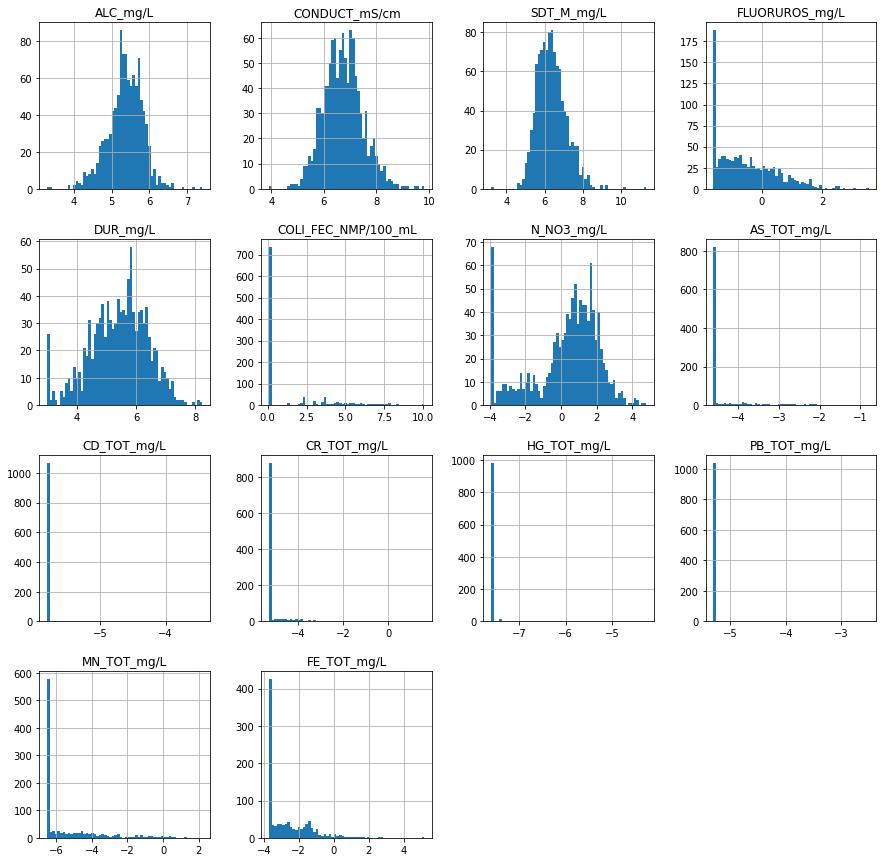

In [39]:
#Impresión de la gráfica de los datos del DataFrame númerico
Data5.hist(bins = 60, figsize=(15,15))

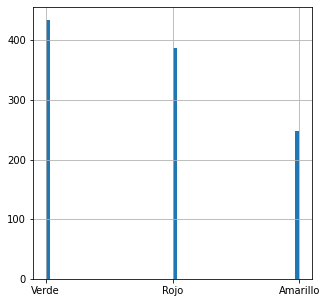

In [40]:
Data4['SEMAFORO'].hist(bins = 60, figsize=(5,5))

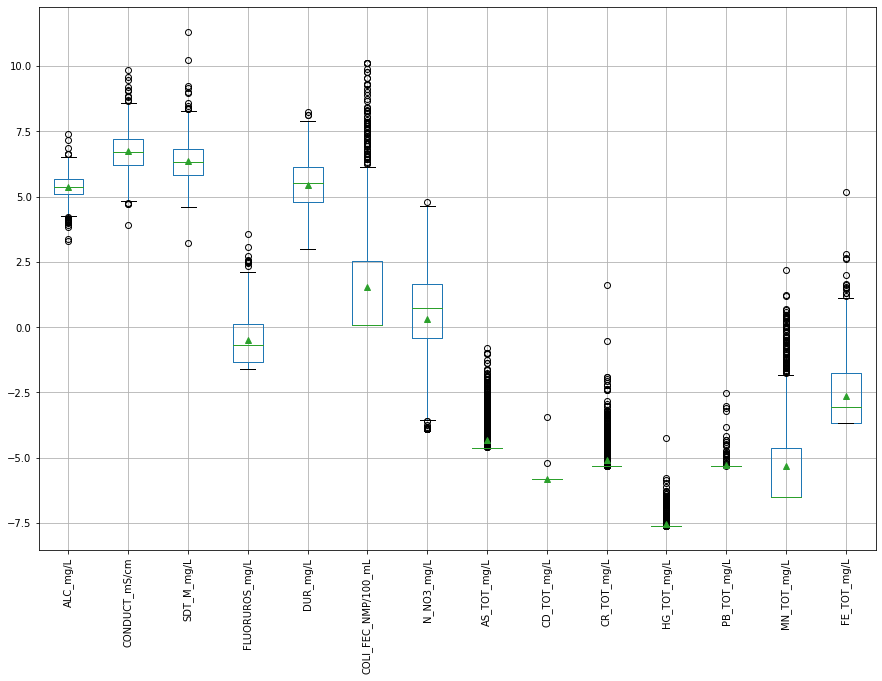

In [41]:
# Gráfica de caja para observar la distribución de los datos y los outliers en cada variable numérica
outliers = Data5.boxplot(figsize = (15,10),showmeans = True)
outliers.plot()
plt.xticks(rotation=90)
plt.show()

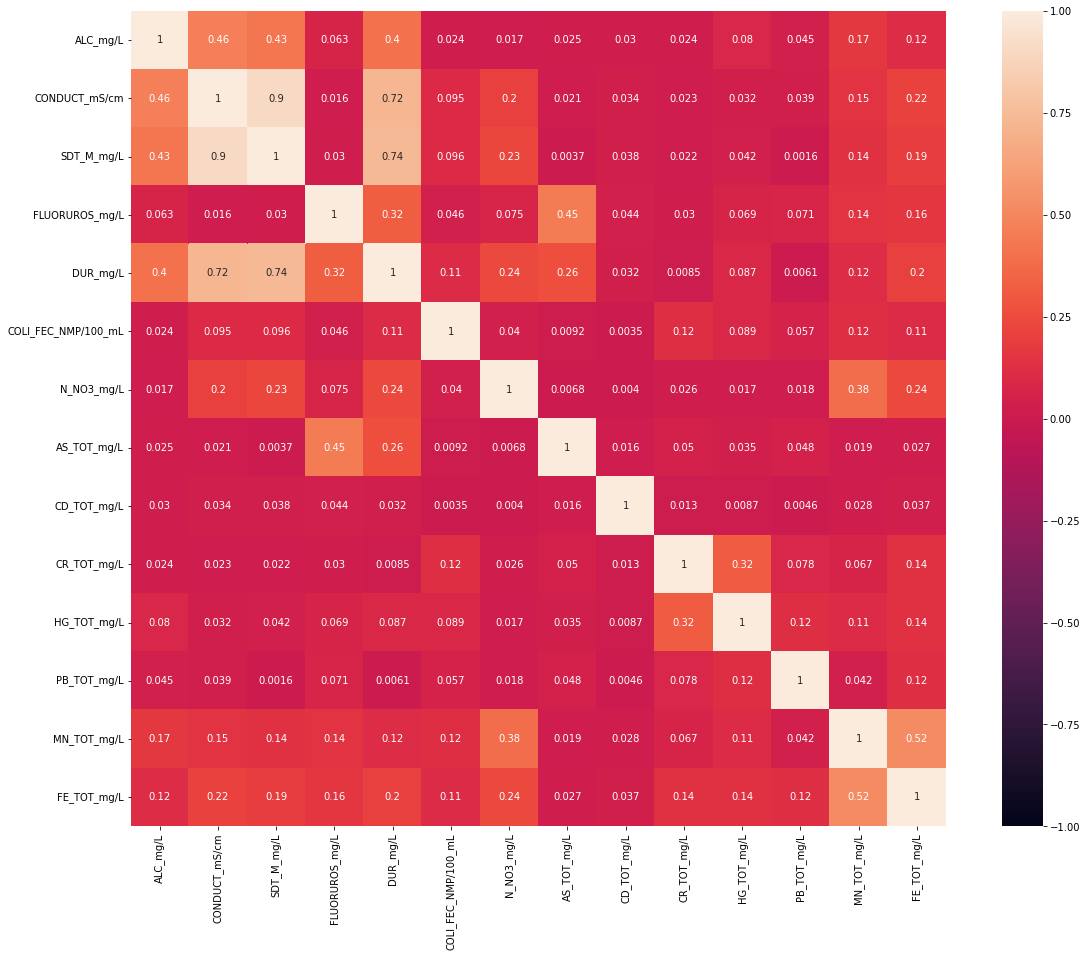

In [42]:
# Gráfica de correlación entre las variables(datos) numéricos
correlacion = Data5.corr().abs() 

f, ax = plt.subplots(figsize = (20,15))

sns.heatmap(correlacion, vmax = 1, vmin = -1, square = True, annot = True)

Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.

Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.


In [43]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

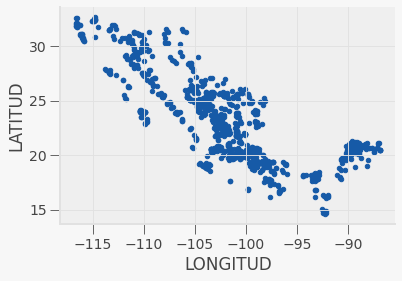

In [44]:
Data4.plot.scatter('LONGITUD','LATITUD')

In [45]:
Data4["Coordinates"] = list(zip(Data4.LONGITUD, Data4.LATITUD))
Data4["Coordinates"] = Data4["Coordinates"].apply(Point)
Data4.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,Coordinates
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.0221 22.20887)
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.20075 21.99958)
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,POINT (-102.28801 22.36685)
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.29449 22.18435)
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,NO,SI,SI,SI,SI,SI,SI,SI,POINT (-110.2448 23.45138)


In [46]:
gdf = gpd.GeoDataFrame(Data4, geometry="Coordinates")
gdf.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,Coordinates
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.02210 22.20887)
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.20075 21.99958)
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,POINT (-102.28801 22.36685)
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,POINT (-102.29449 22.18435)
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,NO,SI,SI,SI,SI,SI,SI,SI,POINT (-110.24480 23.45138)


In [47]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [48]:
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

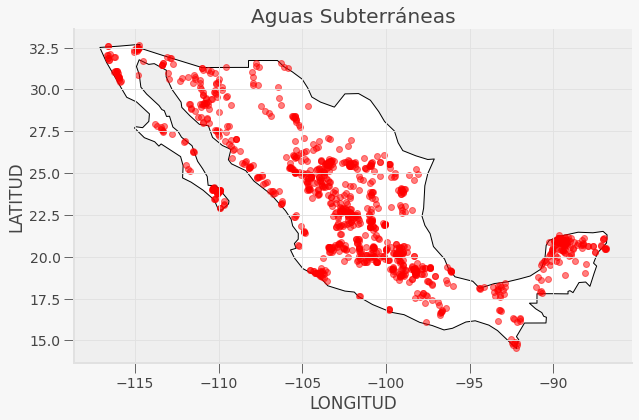

In [49]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

# localidades
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('LONGITUD')
gax.set_ylabel('LATITUD')
gax.set_title('Aguas Subterráneas')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

Kmeans

In [50]:
latlong = Data4[["LONGITUD","LATITUD"]]
latlong

,LONGITUD,LATITUD
0,-102.02210,22.20887
1,-102.20075,21.99958
2,-102.28801,22.36685
3,-102.29449,22.18435
4,-110.24480,23.45138
...,...,...
1063,-99.54191,24.76036
1064,-99.70099,24.78280
1065,-99.82249,25.55197
1066,-100.32683,24.80118


In [51]:
X = latlong ["LONGITUD"]
y = latlong ["LATITUD"]

In [52]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(latlong)
df_latlong = pd.DataFrame(scaler.transform(latlong))
df_latlong.columns = latlong.columns

k_range = range(1,10)
sse = []

for k in k_range:
  km  = KMeans(n_clusters= k)
  km.fit(df_latlong)
  sse.append(km.inertia_)

In [53]:
#Modelo de predicción

model = KMeans(n_clusters=6, max_iter=1000, random_state=0)
y_pred = model.fit_predict(df_latlong)

df_centers = pd.DataFrame(model.cluster_centers_)
df_centers.columns = latlong.columns
df_centers

,LONGITUD,LATITUD
0,0.291255,0.606203
1,0.662719,0.204509
2,0.920268,0.325841
3,0.471000,0.568943
4,0.505817,0.352618
5,0.149674,0.872261


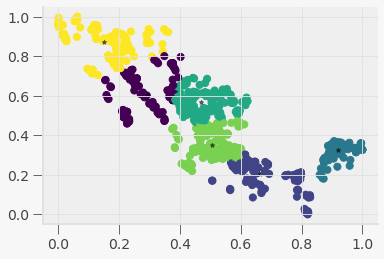

In [54]:
# Creando los clusters
plt.scatter(df_latlong["LONGITUD"], df_latlong["LATITUD"], c=y_pred, s=50, cmap='viridis')
plt.scatter(df_centers["LONGITUD"], df_centers["LATITUD"], c='black',marker="*", s=20, alpha=.5);

In [55]:
df_Centers_RealCoordenates = pd.DataFrame(scaler.inverse_transform(df_centers))
df_Centers_RealCoordenates.columns = df_centers.columns
df_Centers_RealCoordenates
df_Centers_RealCoordenates = pd.DataFrame(scaler.inverse_transform(df_centers))
df_Centers_RealCoordenates.columns = df_centers.columns
df_Centers_RealCoordenates

,LONGITUD,LATITUD
0,-107.984806,25.543466
1,-96.915148,18.266147
2,-89.240131,20.464273
3,-102.628404,24.868437
4,-101.590827,20.949379
5,-112.203939,30.363517


In [56]:
# Los grupo para hacer un Dataframe por cluster
y_pred = pd.DataFrame(y_pred)
y_pred.columns = ["Clusters"]
df0 = y_pred[y_pred.Clusters == 0]
df1 = y_pred[y_pred.Clusters == 1]
df2 = y_pred[y_pred.Clusters == 2]
df3 = y_pred[y_pred.Clusters == 3]
df4 = y_pred[y_pred.Clusters == 4]
df5 = y_pred[y_pred.Clusters == 5]

print("Cluster 0: "+ str(df0.shape))
print("Cluster 1: "+ str(df1.shape))
print("Cluster 2: "+ str(df2.shape))
print("Cluster 3: "+ str(df3.shape))
print("Cluster 4: "+ str(df4.shape))
print("Cluster 5: "+ str(df5.shape))

Cluster 0: (136, 1)
Cluster 1: (154, 1)
Cluster 2: (125, 1)
Cluster 3: (232, 1)
Cluster 4: (282, 1)
Cluster 5: (139, 1)


In [57]:
#Verificar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.

In [58]:
semaforo = Data4[["LONGITUD","LATITUD", "SEMAFORO"]]
semaforo["SEMAFORO"] = semaforo["SEMAFORO"].replace("Rojo", 1)
semaforo["SEMAFORO"] = semaforo["SEMAFORO"].replace("Amarillo", 2)
semaforo["SEMAFORO"] = semaforo["SEMAFORO"].replace("Verde", 3)
semaforo

,LONGITUD,LATITUD,SEMAFORO
0,-102.02210,22.20887,3
1,-102.20075,21.99958,3
2,-102.28801,22.36685,1
3,-102.29449,22.18435,3
4,-110.24480,23.45138,1
...,...,...,...
1063,-99.54191,24.76036,1
1064,-99.70099,24.78280,1
1065,-99.82249,25.55197,1
1066,-100.32683,24.80118,3


Agrupando los datos para análisis por semáforos

In [59]:
rojo = semaforo[semaforo["SEMAFORO"] == 1]
verde = semaforo[semaforo["SEMAFORO"] == 3]
amarillo = semaforo[semaforo["SEMAFORO"] == 2]

In [60]:
scaler = MinMaxScaler()
scaler.fit(verde)
df_latlong = pd.DataFrame(scaler.transform(verde))
df_latlong.columns = verde.columns

k_range = range(1,10)
sse = []

for k in k_range:
  km  = KMeans(n_clusters= k)
  km.fit(df_latlong)
  sse.append(km.inertia_)

In [61]:
#Modelo de predicción

model = KMeans(n_clusters=1, max_iter=1000, random_state=0)
y_pred = model.fit_predict(df_latlong)

df_centers = pd.DataFrame(model.cluster_centers_)
df_centers.columns = verde.columns
df_centers

,LONGITUD,LATITUD,SEMAFORO
0,0.493828,0.459623,0.0


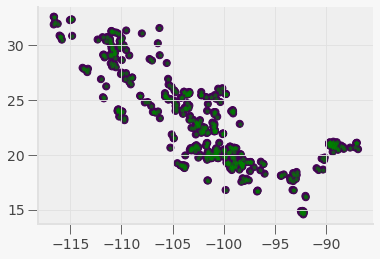

In [62]:
# Creando los clusters por semáforo veerde
plt.scatter(verde["LONGITUD"], verde["LATITUD"], c=y_pred, s=50, cmap='viridis')
plt.scatter(verde["LONGITUD"], verde["LATITUD"], c='green',marker="*", s=20, alpha=.5);

In [63]:
scaler = MinMaxScaler()
scaler.fit(amarillo)
df_latlong = pd.DataFrame(scaler.transform(amarillo))
df_latlong.columns = amarillo.columns

k_range = range(1,10)
sse = []

for k in k_range:
  km  = KMeans(n_clusters= k)
  km.fit(df_latlong)
  sse.append(km.inertia_)

In [64]:
#Modelo de predicción

model = KMeans(n_clusters=1, max_iter=1000, random_state=0)
y_pred = model.fit_predict(df_latlong)

df_centers = pd.DataFrame(model.cluster_centers_)
df_centers.columns = amarillo.columns
df_centers

,LONGITUD,LATITUD,SEMAFORO
0,0.583289,0.399428,0.0


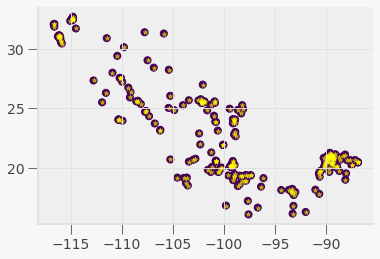

In [65]:
# Creando los clusters por semáforo amarillo
plt.scatter(amarillo["LONGITUD"], amarillo["LATITUD"], c=y_pred, s=50, cmap='viridis')
plt.scatter(amarillo["LONGITUD"], amarillo["LATITUD"], c='yellow',marker="*", s=20, alpha=.5);

In [66]:
scaler = MinMaxScaler()
scaler.fit(rojo)
df_latlong = pd.DataFrame(scaler.transform(rojo))
df_latlong.columns = rojo.columns

k_range = range(1,10)
sse = []

for k in k_range:
  km  = KMeans(n_clusters= k)
  km.fit(df_latlong)
  sse.append(km.inertia_)

In [67]:
#Modelo de predicción

model = KMeans(n_clusters=1, max_iter=1000, random_state=0)
y_pred = model.fit_predict(df_latlong)

df_centers = pd.DataFrame(model.cluster_centers_)
df_centers.columns = rojo.columns
df_centers

,LONGITUD,LATITUD,SEMAFORO
0,0.456144,0.504483,0.0


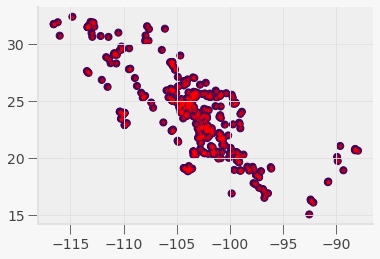

In [68]:
# Creando los clusters por semáforo amarillo
plt.scatter(rojo["LONGITUD"], rojo["LATITUD"], c=y_pred, s=50, cmap='viridis')
plt.scatter(rojo["LONGITUD"], rojo["LATITUD"], c='red',marker="*", s=20, alpha=.5);

# **Conclusiones**



Observamos que está actividad tuvo dos objetivos principales:
1. Reforzar las conocimientos en las metodologías de limpieza de datos, de análisis de los valores numéricos y sus tendencias, así como el uso de la función Kmeans para formar clúster, que de acuerdo a los resultados apoyen para la toma de decisiones.

2. Analizar una base de datos del mundo real, analizar los datos y poder ofrecer resultados del manejo de datos para la toma de decisiones en el caso de la calidad de las aguas subterráneas en México.

Para la realización de este trabajo se usó la base de datos de **aguas subterráneas**, la cual tiene las dimensiones de 1068 x 57.

**Limpieza de base de datos.**
La base de datos usada muestra poca calidad en su conformación, pues además de presentar muchos datos faltantes de  diversa variables, algunas incluso sin datos; otras donde deberían capturar datos numéricos se capturaron alfanuméricos (string), lo que dificultó el análisis y la limpieza se tuvo que realizar cuidadosamente, variable por variable, se tuvo que consultar el contenido de la base de datos para tener un panorama real de su composición.

A través de la identificación de datos se limpiaron las columnas o renglones sin datos.

Posterior, se hizo la identificación de las columnas de variables por categóricas, ordinales, numéricas y binarias, para cada una de ellas se realizaron las siguientes imputaciones en caso de los datos faltantes:
• Numéricos: imputación a la mediana
• Categórica: imputación a la moda
• Binarias: imputación a la moda
• Ordinales: imputación a la moda

**Identificando tendencias centrales promedio, media y mediana de los datos.**

Al realizar el análisis estadísticos de los datos, en general, se observó que las aguas subterráneas analizadas tienen una menor concentración de arsénico, cadmio, cromo, mercurio, manganeso y plomo. Aquellas variables que tienen una mayor concentración en aguas son: alcalinidad, conductividad de micro siemens, solidos disueltos totales y dureza total.

**Identificar medidas de dispersión, máximo, mínimo**

Las variables que tienen la mayor dispersión entre los datos son coliformes fecales y el nitrógeno de nitratos.

**Identificar medidas de posición no centrales, los cuartiles , outliers**

Las siguientes variables presentan muchos outliers entre sus datos: alcalinidad, conductividad de microsiemens, solidos disueltos totales, dureza total, arsénico, cadmio, cromo, mercurio, manganeso y plomo.

**Identificar correlaciones.**

Las correlaciones más fuertes entre los datos son:

* Solidos Disueltos Totales-Medidos y Conductividad en microSiemens con 0.9
* Dureza total y Sólidos Disueltos Totales con 0.74
* Dureza total y Conductividad en microSiemens con 0.72
* Manganeso Total Y hierro Total con 0.52

Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.

En la identificación de cada uno de los semáforos revisados, no encontramos relación entren la calidad del agua y sus ubicaciones geográficas. Por un lado, k-means a través de la ubicación geográfica de cada uno de los puntos se pudieron encontrar 6 clústeres que muestran los diferentes bloques pueden hallarse, no obstante, la ubicación de los diferentes semáforos está dispersos por todo el país, la concentración visualmente es distinta, pero no se logra observar un patrón entre cada uno de ellos.

Sin embargo hacer la clasificación de los datos de las aguas subterráneas por semáforos, a pesar de no pode hacer un análisis significativo por clúster, fue muy útil pue se pueden identificar la localidades que muestran alguno de los tres niveles de calidad del agua.

En resumen concluimos que la limpieza de datos es fundamental para mejorar la calidad de las base de datos y como consecuencia obtener resultados confiables en los diversos tipos de análisis que se harán sobre esos datos. Y que un buen análisis de datos con las diversas herramientas disponibles puede ofrecer resultados que apoyarán fuertemente a la toma decisiones con tales datos.


# Índice de la entrega 2

Clasificación

En esta base de datos encontraras:

* Aguas subterráneas.
* Aguas superficiales.

Utilizando la base de datos que hayas elegido y hayas realizado su limpieza en la anterior entrega del reto, realiza lo siguiente:

* Selecciona tus variables independientes X y dependiente Y (semáforo)
* Cambia a label encoding el semáforo, ej, de ["clase 1", "clase 2", "clase 3"] a [ 1,2,3]
* Realiza un análisis general de las features importances a traves de decision trees o random forest.
* Selecciona las variables de mayor importancia.
* Realiza tu clasificador, recuerda dividir los datos de manera balanceada (auxiliate de train test split)
* Explora que clasificador es el más optimo, ejemplo: 
 * Decision trees
 * Random Forest.
* Determina el grado de exactitud a través del reporte de clasificación
* Visualiza los resultados del modelo o las predicciones a través de una matriz de confusión.

Realiza un reporte de los principales hallazgos y conclusiones del experimento e incluyelos en una presentación ejecutiva de 10 diapositivas. La presentación deberá incluir todos los pasos del pipeline seguidos, limpieza, análisis, kmeans, clasificación, resultados y conclusiones.

In [74]:
Y = semaforo[['SEMAFORO']] #información de los semáforos ya transformados en 1, 2 y 3
X = Data5 #información de las variables numércias

In [77]:
Y.head()
print('Tamaño de dataset Y: ',Y.shape)

Tamaño de dataset Y:  (1068, 1)


In [88]:
X.head()
print('Tamaño de dataset X: ',X.shape)

Tamaño de dataset X:  (1068, 14)


In [79]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [91]:
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
X.data = X
Y.target = Y
rnd_clf.fit(X.data, Y.target)
for score, name in zip(rnd_clf.feature_importances_, X.data.columns):
    print(round(score, 2), name)

0.04 ALC_mg/L
0.07 CONDUCT_mS/cm
0.07 SDT_M_mg/L
0.21 FLUORUROS_mg/L
0.12 DUR_mg/L
0.09 COLI_FEC_NMP/100_mL
0.11 N_NO3_mg/L
0.12 AS_TOT_mg/L
0.0 CD_TOT_mg/L
0.02 CR_TOT_mg/L
0.01 HG_TOT_mg/L
0.01 PB_TOT_mg/L
0.07 MN_TOT_mg/L
0.08 FE_TOT_mg/L


In [92]:
X = X[['FLUORUROS_mg/L','DUR_mg/L','N_NO3_mg/L','AS_TOT_mg/L']] #Seleccionando las caracteristicas numéricas de mayor importancia

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.85, random_state=0)

In [93]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=27,
                                 n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [95]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

In [96]:
from sklearn.metrics import classification_report